<a href="https://colab.research.google.com/github/kavyasalian/Machine_learning_using_linear_regression/blob/master/linear_regression_on_Salary_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
data = pd.read_csv('Salary_Data.csv')


In [ ]:
data2 = data.corr('pearson')
data2

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
abs(data2.loc['Salary']).sort_values(ascending=False)

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

In [ ]:
x = data['YearsExperience']
y = data['Salary']

In [ ]:
x = np.array(x/x.mean())
y = np.array(y/y.mean())

In [ ]:
n = int(0.8*len(x))
x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

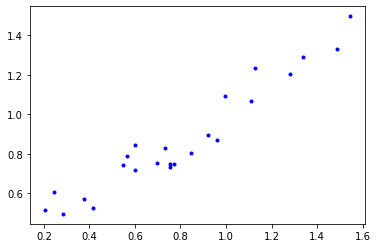

In [ ]:
plt.plot(x_train, y_train, 'b.')

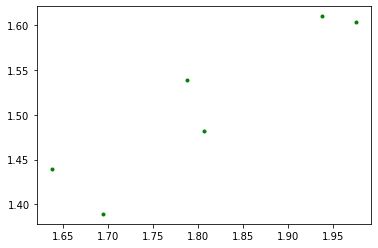

In [ ]:
plt.plot(x_test, y_test, 'g.')

In [ ]:
def hypothesis(a,b,x):
  return a*x + b

In [ ]:
def error(a,b,x,y):
  e = 0
  m = len(y)
  for i in range(m):
    e += np.power((hypothesis(a,b,x[i])-y[i]),2)
    print(hypothesis(a,b,x[i])  ,  y[i])
    
  return (1/(2*m)) *e

In [ ]:
def step_gradiet(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m * (hypothesis(a,b,x[i])-y[i]) *x[i]
    grad_b += 1/m * (hypothesis(a,b,x[i])-y[i])
  
  a = a- (grad_a * learning_rate)
  b = b- (grad_b * learning_rate)
  return a,b

In [ ]:
def descend(initial_a, initial_b, x,y,learning_rate, iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i % 1000 ==0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradiet(a,b,x,y,learning_rate)
  return a,b

In [ ]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Streaming output truncated to the last 5000 lines.
1.0122901203699213 1.0932200044735076
1.0916218594675344 1.0705235319658435
1.1048438159838032 1.236003841953607
1.2106194681139537 1.2070313013959975
1.2502853376627603 1.2930147494177862
1.356060989792911 1.3328684394037078
1.3957268593417171 1.4974672052418982
0.45696780745382276 0.517650619054511
0.4834117284043651 0.6079365288212307
0.5098556493549073 0.4964409299632909
0.5759654517312632 0.572674762838309
0.6024093726818056 0.5248608607554965
0.6949630960087037 0.745260055524124
0.7081850564839749 0.7914161283107246
0.7346289774345172 0.7163533018433483
0.7346289774345172 0.8479270555109667
0.8007387798108729 0.7524571398497428
0.8271827007614152 0.8317829559359499
0.8404046612366864 0.73410260121311
0.8404046612366864 0.7494046287646541
0.8536266217119577 0.7510361433101325
0.9065144636130422 0.8040603660381827
0.959402305514127 0.8938857676670657
0.9858462264646692 0.8687683380919174
1.0122901474152115 1.0932200044735076
1.0916

In [ ]:
print(error(a,b,x_train, y_train))
print(error(final_a,final_b, x_train, y_train))

0.04517872897356523
0.0030396049973588826


In [ ]:
print(error(final_a, final_b, x_test, y_test))

0.0030812213676463486


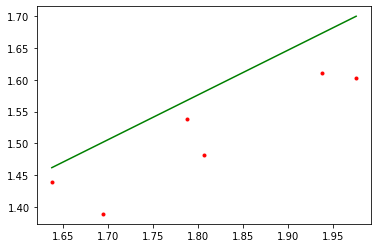

In [ ]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')

In [ ]:
accuracy=100-error(final_a, final_b, x_test, y_test)
print (accuracy)

1.4618677252471919 1.4398247437601148
1.5015358785802895 1.3891820059734483
1.5676494674687855 1.5390050392747654
1.5808721852464847 1.4819809744352197
1.6734312096903792 1.610344328513348
1.6998766452457774 1.6035156506979988
99.99691877863235


In [ ]:
accuracy=100-error(final_a, final_b, x_train, y_train)

In [ ]:

print (accuracy)

99.99696039500265
